In [1]:
import sys
sys.path.insert(0, "../../")
import numpy as np
import matplotlib.pyplot as plt
from nd_emulator import build_emulator
from data_loading_functions import load_SFHo_EOS

In [87]:
EOS_file = "../../../tables/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5"
vars, domain = load_SFHo_EOS(EOS_file)
spacing = ['linear', 'linear', 'linear']  # We will do the transform ahead of time.
# get subset of Abar
# L = 10
abar = vars['Abar']['f']#[:L, :L, :L]

# Specify model types
# -- add each model type to the list in the format of a dict {'type': name, ...}
model_classes = [{'type': 'nd-linear'}]
error_type = 'RMSE'

# set tree parameters
# -- Make sure the depth of the tree is not so deep that there is not enough data
# -- for example. If the smallest values in dims is 2**3+1, then the max depth you
# -- can choose is 3.
max_depth = 100  # as much refinement as needed.
error_threshold = -1.0
max_test_points = 100  # The max number of points to eval in a cell when estimating the error
relative_error = True  # Whether or not the error threshold is absolute or relative error

# create the emulator (should not need to modify this)
emulator, tree = build_emulator({'f': abar}, max_depth, domain, spacing, error_threshold, model_classes,
                                max_test_points=max_test_points, relative_error=relative_error,
                                expand_index_domain=True, return_tree=True, error_type=error_type)

max_depth = tree.achieved_depth
leaves = tree.get_leaves()

C:\Users\carls502\OneDrive - Michigan State University\Research\ANL\ND-tree_tabular_data_emulator\nd_emulator\domain_functions.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if spacings[i] == 'linear':
C:\Users\carls502\OneDrive - Michigan State University\Research\ANL\ND-tree_tabular_data_emulator\nd_emulator\domain_functions.py:38: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif spacings[i] == 'log':


WARNING!
You have chosen a max depth that is greater than can be supported by your data.
The max depth has been changed to 8.



KeyboardInterrupt: 

In [ ]:

D =max_depth
num_dims = tree.num_dims
n = 2**(D*num_dims)
errors = np.zeros([n, D+1])
ids = np.zeros_like(errors)
def get_errors(ni, nf, d, node):
    if d == D+1:
        return
    errors[ni:nf, d] = node['error']
    s_id = '0'
    for s in node['id']:
        s_id += f'{s}'
    ids[ni:nf, d] = float(s_id)
    nx = (nf - ni)//2**num_dims
    if d < D:
        for i in range(2**num_dims):
            get_errors(ni + i*nx, ni + (i+1)*nx, d+1, node['children'][i])
    return

get_errors(0, n, 0, tree.root)
errors

In [ ]:
errors_new = errors.copy()
EPS = 10**-16
for i in range(len(errors[:,0])):
    h = 1
    # linear fit
    hs = np.log(np.array([1, 0.5, 0.25, 0.125, 0.125/2.]))
    fit = np.polyfit(hs[-3:-1], np.log(errors[i, -3:-1] + EPS), h)
    last_col = fit[0]*hs[-1] + fit[1]
    errors_new[i,-1] = np.exp(last_col)

    # plt.plot(hs, errors_new[0,:])
    # plt.plot(hs, k[0,-2]*hs**h)

In [ ]:
data = np.array([max(10**-16, v) for v in errors_new[:,-1]])
bins = 10
d, b, p = plt.hist(np.log10(data), bins, density=True, range=[-16, -6])
# plt.plot(d,b)

In [4]:

import pandas as pd
pd.set_option('display.float_format', '{:.2g}'.format)



num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981
num_cells = 2333981


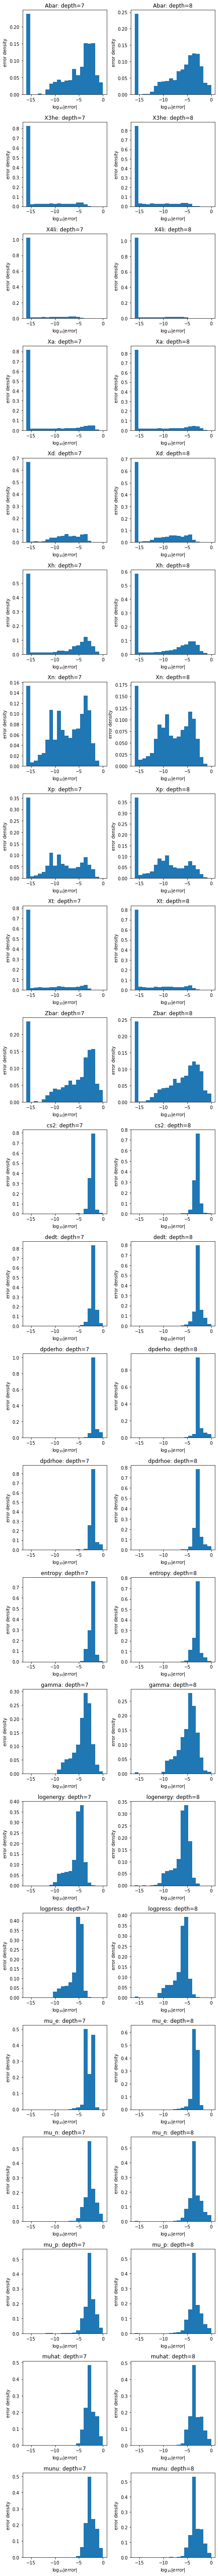

In [17]:

EOS_file = "../../../tables/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5"
vars, domain = load_SFHo_EOS(EOS_file)
fig, ax = plt.subplots(len(vars.keys()), 2, figsize=[7, 3.5*23])
for i, key in enumerate(vars.keys()):
    errors_loaded = np.load(f'./error_data/errors_{key}.npy')
    print(f'num_cells = {errors_loaded.shape[0]}')
    ax[i, 0].set_xlabel("$\log_{10}|error|$")
    ax[i, 0].set_ylabel("error density")
    ax[i, 1].set_xlabel("$\log_{10}|error|$")
    ax[i, 1].set_ylabel("error density")
    ax[i, 0].set_title(f'{key}: depth=7')
    ax[i, 1].set_title(f'{key}: depth=8')
    bins = 20
    data = np.array([min(max(10**-16, v), 1) for v in errors_loaded[:,-2]])
    d, b, p = ax[i, 0].hist(np.log10(data), bins, density=True, range=[-16,0])
    data = np.array([min(max(10**-16, v), 1)  for v in errors_loaded[:,-1]])
    d, b, p = ax[i, 1].hist(np.log10(data), bins, density=True, range=[-16,0])
    # plt.plot(d,b)
plt.tight_layout()
plt.savefig("ErrorPlot.png", dpi=250)
plt.show()


In [18]:
len(vars.keys())

23